<a href="https://colab.research.google.com/github/joaopaulolndev/deep-learning-keras-projects/blob/master/Minist/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [0]:
(X_treinamento, y_treinamento),(X_teste, y_teste) = mnist.load_data()

Text(0.5, 1.0, 'Classe 5')

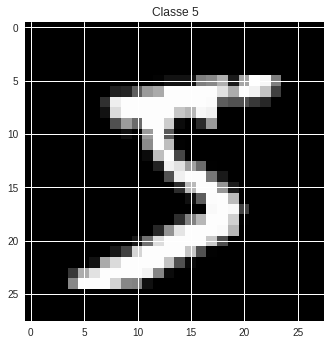

In [0]:
plt.imshow(X_treinamento[0], cmap='gray')
plt.title('Classe ' + str(y_treinamento[0]) )

In [0]:
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)

In [0]:
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [0]:
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste       = previsores_teste.astype('float32')

In [0]:
previsores_treinamento /= 255
previsores_teste /= 255

In [0]:
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)

In [0]:
classe_teste = np_utils.to_categorical(y_teste, 10)

In [0]:
classificador = Sequential()
classificador.add( Conv2D( 32, (3,3), input_shape=(28,28,1), activation = 'relu' ) )
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2)))


classificador.add(Conv2D( 32, (3,3), activation = 'relu' ))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2)))
classificador.add(Flatten())

classificador.add( Dense( units=128, activation='relu') )
classificador.add(Dropout(0.2))
classificador.add( Dense( units=128, activation='relu') )
classificador.add(Dropout(0.2))
classificador.add( Dense( units=10, activation='softmax') )

In [0]:
classificador.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
classificador.fit(previsores_treinamento, classe_treinamento, batch_size=128, epochs=5, validation_data=(previsores_teste, classe_teste))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 133s 2ms/step - loss: 0.2043 - acc: 0.9364 - val_loss: 0.0522 - val_acc: 0.9831
Epoch 2/5
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0656 - acc: 0.9804 - val_loss: 0.0396 - val_acc: 0.9872
Epoch 3/5
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0476 - acc: 0.9858 - val_loss: 0.0379 - val_acc: 0.9882
Epoch 4/5
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0378 - acc: 0.9884 - val_loss: 0.0307 - val_acc: 0.9900
Epoch 5/5
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0299 - acc: 0.9911 - val_loss: 0.0293 - val_acc: 0.9905


In [0]:
resultado = classificador.evaluate(previsores_teste, classe_teste)

10000/10000 [==============================] - 6s 601us/step
